In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

In [0]:
df_confir = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
df_death = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')
df_recov = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv')

Covid-19 is highly contagious but not as deadly, particularly for young people. So, I will focus primarily on the Confirmed Cases

In [0]:
df_c = df_confir.copy()
df_d = df_death.copy()
df_r = df_recov.copy()

In [4]:
print(df_confir.shape)                                      #(States,Days+4)
df_confir.shape == df_death.shape == df_recov.shape

(487, 65)


True

In [5]:
df_confir.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,14,14,14,19,19,19,19,25,25,25,25,32,32,32,33,33,33,33,33,34,35,35,35,35,35,35,35,35,37,40,40,41,42,42,43,43,43,47,48,50,50,50,53,59,70,75,82,114,147,177,212,272,322,411,599
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,7,7,11,15,20,20,20,22,22,45,25,25,26,26,26,28,28,29,43,59,66,74,84,94,105,122,147,159,170,189,214,228,241,256,274,293,331,360,420,461,502,511,581,639,639,701,773,839,825,878,889,924,963,1007,1086
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,7,7,10,13,16,18,18,24,28,28,30,33,40,45,47,50,58,67,72,75,77,81,84,84,85,85,89,89,91,93,93,93,102,106,108,110,110,117,130,138,150,150,160,178,178,200,212,226,243,266,313,345,385,432,455
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,4,7,8,8,8,8,8,10,12,12,12,16,16,18,18,18,19,19,22,22,22,22,22,22,22,22,22,22,22,22,23,23,25,29,29,36,50,50,83,93,99,117,129,149,149,197,238,428,566,673,790,900,1030,1183,1306


In [6]:
df_confir.describe()           #df_death,df_recov                       #Mean conveys an increasing Trend

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
count,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000
mean,30.580962,-33.601551,1.139630,1.340862,1.932238,2.944559,4.349076,6.010267,11.453799,12.661191,16.907598,20.383984,24.718686,34.470226,40.823409,49.059548,56.745380,63.279261,70.618070,76.221766,82.443532,87.806982,91.995893,92.856263,123.958932,137.340862,141.745380,146.250513,150.427105,154.283368,155.316222,156.462012,157.747433,161.353183,162.145791,163.383984,165.119097,167.135524,169.926078,172.731006,176.613963,181.455852,185.433265,190.636550,195.318275,200.989733,209.002053,217.291581,225.451745,233.184805,243.515400,258.449692,263.537988,298.137577,320.521561,343.831622,372.745380,404.809035,441.293634,498.373717,558.862423,625.305955,689.845996
std,19.645817,81.064011,20.170391,20.253507,25.229268,35.129844,49.109575,66.178567,162.190044,163.249708,224.934544,266.700712,328.167736,509.770317,616.199457,759.372972,894.810687,1005.857379,1134.662323,1232.053868,1346.701977,1441.711614,1515.952301,1516.246437,2187.207498,2467.826494,2551.329127,2638.883597,2720.719605,2797.390990,2813.227422,2831.838619,2841.890472,2906.276891,2906.341402,2915.616686,2938.275585,2956.626633,2975.654917,2990.886286,3011.609857,3039.283579,3050.440003,3059.817815,3068.479139,3079.154546,3092.273854,3105.489134,3118.029077,3132.790594,3145.105188,3170.345089,3177.926018,3248.509243,3309.559050,3380.171621,3463.800169,3561.212709,3693.726599,3886.851115,4121.144328,4397.961371,4658.551576
min,-41.454500,-157.858400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,-91.733100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.545500,-73.794900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000

In [0]:
CatVar = list(set(df_confir.columns) - set(df_confir.describe().columns))                 #Categorical Variables

In [8]:
df_confir[CatVar].isnull().sum()

Country/Region      0
Province/State    162
dtype: int64

In [9]:
df_confir = df_confir.groupby('Country/Region').aggregate(sum)
df_death = df_death.groupby('Country/Region').aggregate(sum)
df_recov = df_recov.groupby('Country/Region').aggregate(sum)
#df_confir.head()
df_c1 = df_confir.copy()
print("Number of Affected Countries = ", df_confir.shape[0])                        

Number of Affected Countries =  171


# **EDA**

In [10]:
df_confir.drop(['Lat','Long'],axis=1,inplace=True)
df_death.drop(['Lat','Long'],axis=1,inplace=True)
df_confir.sort_values(by=[df_confir.columns[0]],ascending=False).head()                             #Originated from China

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
China,548,643,920,1406,2075,2877,5509,6087,8141,9802,11891,16630,19716,23707,27440,30587,34110,36814,39829,42354,44386,44759,59895,66358,68413,70513,72434,74211,74619,75077,75550,77001,77022,77241,77754,78166,78600,78928,79356,79932,80136,80261,80386,80537,80690,80770,80823,80860,80887,80921,80932,80945,80977,81003,81033,81058,81102,81156,81250,81305,81397
Japan,2,1,2,2,4,4,7,7,11,15,20,20,20,22,22,45,25,25,26,26,26,28,28,29,43,59,66,74,84,94,105,122,147,159,170,189,214,228,241,256,274,293,331,360,420,461,502,511,581,639,639,701,773,839,825,878,889,924,963,1007,1086
Thailand,2,3,5,7,8,8,14,14,14,19,19,19,19,25,25,25,25,32,32,32,33,33,33,33,33,34,35,35,35,35,35,35,35,35,37,40,40,41,42,42,43,43,43,47,48,50,50,50,53,59,70,75,82,114,147,177,212,272,322,411,599
"Korea, South",1,1,2,2,3,4,4,4,4,11,12,15,15,16,19,23,24,24,25,27,28,28,28,28,28,29,30,31,31,104,204,433,602,833,977,1261,1766,2337,3150,3736,4335,5186,5621,6088,6593,7041,7314,7478,7513,7755,7869,7979,8086,8162,8236,8320,8413,8565,8652,8799,8897
Taiwan*,1,1,3,3,4,5,8,8,9,10,10,10,10,11,11,16,16,17,18,18,18,18,18,18,18,20,22,22,23,24,26,26,28,30,31,32,32,34,39,40,41,42,42,44,45,45,45,45,47,48,49,50,53,59,67,77,100,108,135,153,169


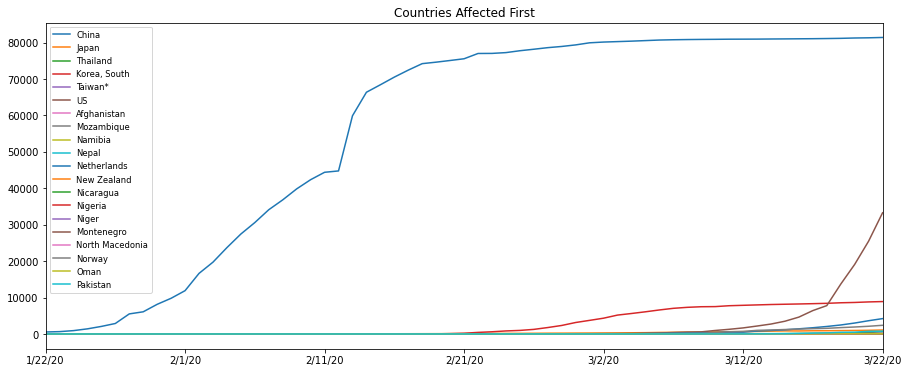

In [11]:
df_confir.sort_values(by=[df_confir.columns[0]],ascending=False)[:20].T.plot(figsize=(15,6))
plt.legend(fontsize='small',loc=2)
plt.title("Countries Affected First");

In [12]:
ts0 = df_confir.sum()[3:]
ts0d = df_death.sum()[3:] 
df = pd.DataFrame(ts0,columns=['Confirmed'])                     
df["Deaths"] = ts0d
print("Total Confirmed Cases Worldwide = ",df.Confirmed[-1])                                              
print("Total Deaths Worldwide = ",df.Deaths[-1])                                              
df.tail()

Total Confirmed Cases Worldwide =  335955
Total Deaths Worldwide =  14632


,Confirmed,Deaths
3/18/20,214910,8733
3/19/20,242708,9867
3/20/20,272166,11299
3/21/20,304524,12973
3/22/20,335955,14632


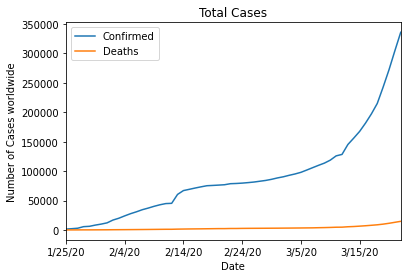

In [13]:
fig = df.plot()
fig.legend(loc=2)
plt.title("Total Cases") 
plt.xlabel("Date")
plt.ylabel("Number of Cases worldwide");

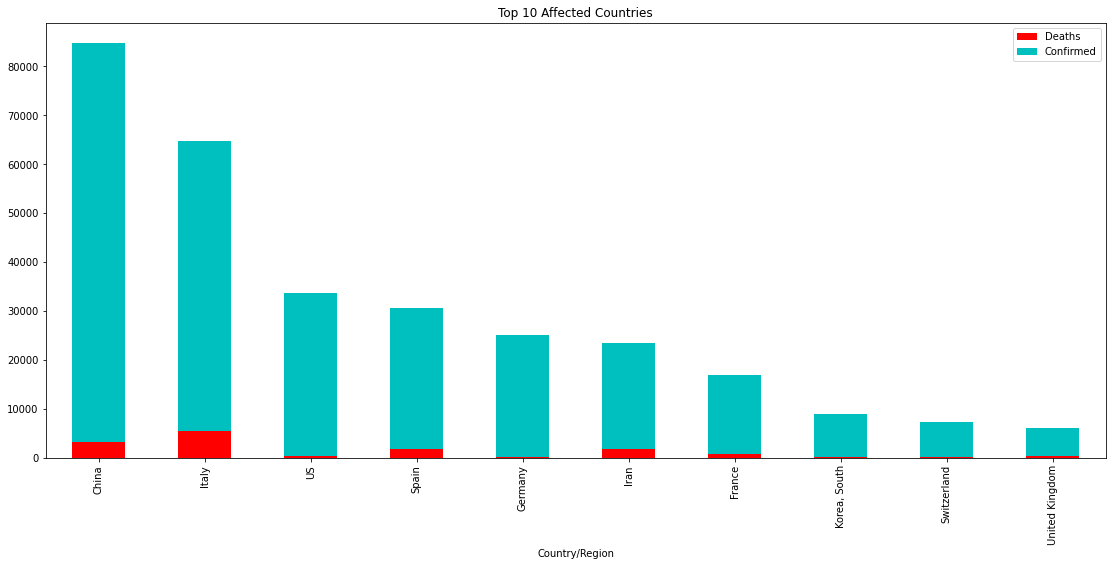

In [14]:
cols = df_confir.columns

df_tpc = df_confir[[cols[-1]]]
df_tpd = df_death[[cols[-1]]]

x = df_tpc.sort_values(by=[cols[-1]],ascending=False)
y = df_tpd.sort_values(by=[cols[-1]],ascending=False)

df_plt = x.merge(y,left_index=True,right_index=True)
df_plt = df_plt.sort_values(by=df_plt.columns[0],ascending=False)[:10]
l = ["Confirmed","Deaths"]
df_plt.columns = l
df_plt = df_plt[reversed(l)]
df_plt.head()
df_plt.plot(kind='bar',stacked=True,color=['r','c'],figsize=(19,8))

plt.title("Top 10 Affected Countries");

At the time of writing, China had almost double the number of confirmed cases as Italy but still had fewer deaths than Italy

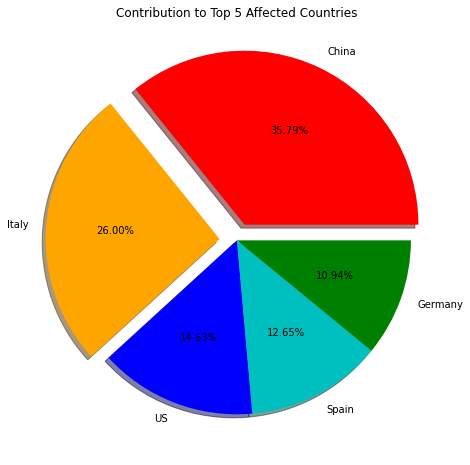

In [15]:
fig = plt.figure(figsize=(8,8))
x1 = df_tpc.sort_values(by=[cols[-1]],ascending=False)[:5] 
plt.pie(x1.values,labels=x1.index,autopct="%.2f%%",explode=[0.1,0.1,0,0,0],colors=['r','orange','b','c','g'],shadow=True)
plt.title("Contribution to Top 5 Affected Countries");

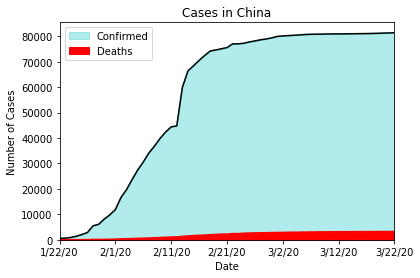

In [16]:
ts = df_confir.loc["China"]
tsd = df_death.loc["China"]
ts.plot(kind='area',color='c',alpha=0.3,label="Confirmed")
tsd.plot(kind='area',color='r',label="Deaths")
plt.title("Cases in China")
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.legend()
ts.plot(color='black');

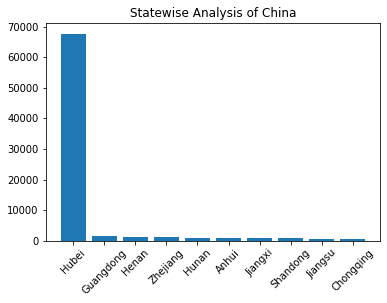

In [17]:
df_plt1 = df_c[df_c['Country/Region']=="China"]
df_plt1 = df_plt1[reversed(df_plt1.columns[[-1,0]])][:10]
plt.bar(df_plt1[df_plt1.columns[0]],df_plt1[df_plt1.columns[1]])
plt.xticks(rotation=45)
plt.title("Statewise Analysis of China");

The outbreak started in Wuhan city in Hubei province. This graph alone conveys how contagious the virus is - once it starts spreading, it is extremely difficult to control

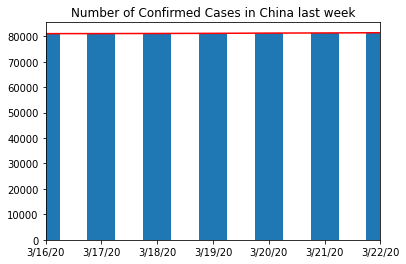

In [18]:
ts.iloc[-7:].plot(kind='bar')
ts.iloc[-7:].plot(color='r')                                      
plt.title("Number of Confirmed Cases in China last week");

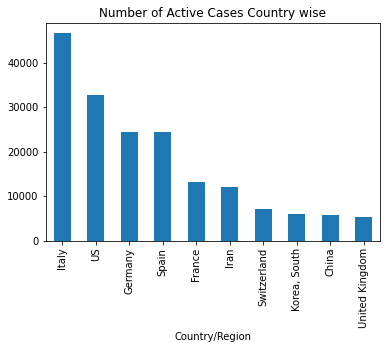

In [19]:
df_act = df_confir.subtract(df_death)#.subtract(df_recov,axis=0)#
df_act = df_act.subtract(df_recov)

df_act[df_confir.columns[-1]].sort_values(ascending=False)[:10].plot(kind='bar')
plt.title("Number of Active Cases Country wise");

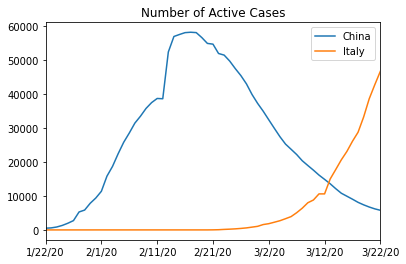

In [20]:
df_act_ch = df_act.loc["China"]
df_act_ch[df_confir.columns].plot(label="China")                         #Closely resembles Gaussian/Normal Distribution
df_act.loc["Italy"][df_confir.columns].plot(label="Italy")               #LHS of Gaussian, resembles exponential Distribution
plt.title("Number of Active Cases")                               
plt.legend();

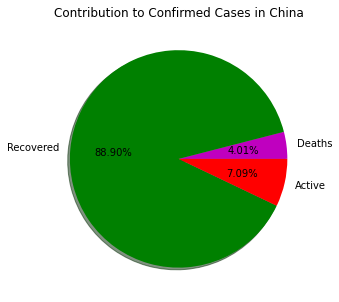

In [21]:
fig = plt.figure(figsize=(5,5))
plt.pie([df_death.loc["China"][-1],df_recov.loc["China"][-1],df_act_ch[df_confir.columns[-1]]],labels=["Deaths","Recovered","Active"],autopct="%.2f%%",colors=['m','g','r'],shadow=True)
plt.title("Contribution to Confirmed Cases in China");

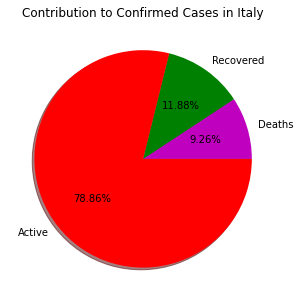

In [22]:
fig = plt.figure(figsize=(5,5))
plt.pie([df_death.loc["Italy"][-1],df_recov.loc["Italy"][-1],df_act.loc["Italy"][df_confir.columns[-1]]],labels=["Deaths","Recovered","Active"],autopct="%.2f%%",colors=['m','g','r'],shadow=True)
plt.title("Contribution to Confirmed Cases in Italy");

As we see, the spread has been cointained in China but is still increasing in Italy. Now, let's see another country where Covid-19 is spreading rapidly - India.

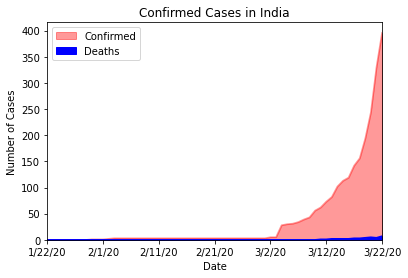

In [23]:
ts_ind = df_confir.loc["India"]
ts_ind.plot(kind='area',color='r',alpha=0.4,label="Confirmed")
df_death.loc["India"].plot(kind='area',color='b',label='Deaths')
plt.legend(loc=2)

plt.title("Confirmed Cases in India")
plt.xlabel("Date")
plt.ylabel("Number of Cases");

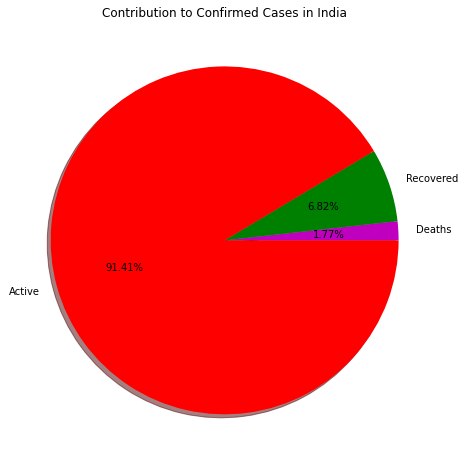

In [24]:
fig = plt.figure(figsize=(8,8))
plt.pie([df_death.loc["India"][-1],df_recov.loc["India"][-1],df_act.loc["India"][df_confir.columns[-1]]],labels=["Deaths","Recovered","Active"],autopct="%.2f%%",colors=['m','g','r'],shadow=True)
plt.title("Contribution to Confirmed Cases in India");

In [41]:
#!pip install folium
import folium

map = folium.Map(location=[25, 25], min_zoom=1, max_zoom=4, zoom_start=2.4)

for i in range(0, len(df_c)):
    if(df_c.iloc[i][-1]==0):
      continue  
    folium.Circle(location=[df_c.iloc[i]['Lat'], df_c.iloc[i]['Long']], color='red', 
        tooltip =   'Country : '+str(df_c.iloc[i]['Country/Region'])+
                    '<br>Province : '+str(df_c.iloc[i]['Province/State'])+
                    '<br>Confirmed : '+str(df_c.iloc[i][-1])+
                    '<br>Deaths : '+str(df_d.iloc[i][-1])+
                    '<br>Recovered : '+str(df_r.iloc[i][-1]),radius=int(df_c.iloc[i][-1])*3).add_to(map)

df_ch = df_c[df_c['Province/State']=="Hubei"]
df_ch = df_c[df_c['Province/State']=="Hubei"]
folium.Marker(location=[df_ch['Lat'].values[0],df_ch['Long'].values[0]],tooltip="Origin",icon=folium.Icon(color='green'),
        popup =    'Country : '+str(df_ch.iloc[0][1]) + 
                    '<br>Province : '+str(df_ch.iloc[0][0]) +
                    '<br>Confirmed : '+str(df_ch.iloc[0][-1]) +
                    '<br>Deaths : '+str(df_d[df_d['Province/State']=="Hubei"].iloc[0][-1]) +
                    '<br>Recovered : '+ str(df_r[df_r['Province/State']=="Hubei"].iloc[0][-1])
                    ).add_to(map)
folium.Marker([df_c1.loc["India"]["Lat"],df_c1.loc["India"]["Long"]],icon=folium.Icon(),tooltip="India",
         popup =    'Confirmed : '+str(df_c[df_c['Country/Region']=="India"].iloc[0][-1]) +
                    '<br>Deaths : '+str(df_d[df_d['Country/Region']=="India"].iloc[0][-1]) +
                    '<br>Recovered : '+ str(df_r[df_r['Country/Region']=="India"].iloc[0][-1])).add_to(map)
folium.Marker([df_c1.loc["Italy"]["Lat"],df_c1.loc["Italy"]["Long"]],icon=folium.Icon('red'),tooltip="Italy",
         popup =   'Confirmed : '+str(df_c[df_c['Country/Region']=="Italy"].iloc[0][-1]) +
                    '<br>Deaths : '+str(df_d[df_d['Country/Region']=="Italy"].iloc[0][-1]) +
                    '<br>Recovered : '+ str(df_r[df_r['Country/Region']=="Italy"].iloc[0][-1])).add_to(map)
map



#Hover over circles or click Markers to get data

Saving Covid-19 on World Map.png to Covid-19 on World Map (3).png


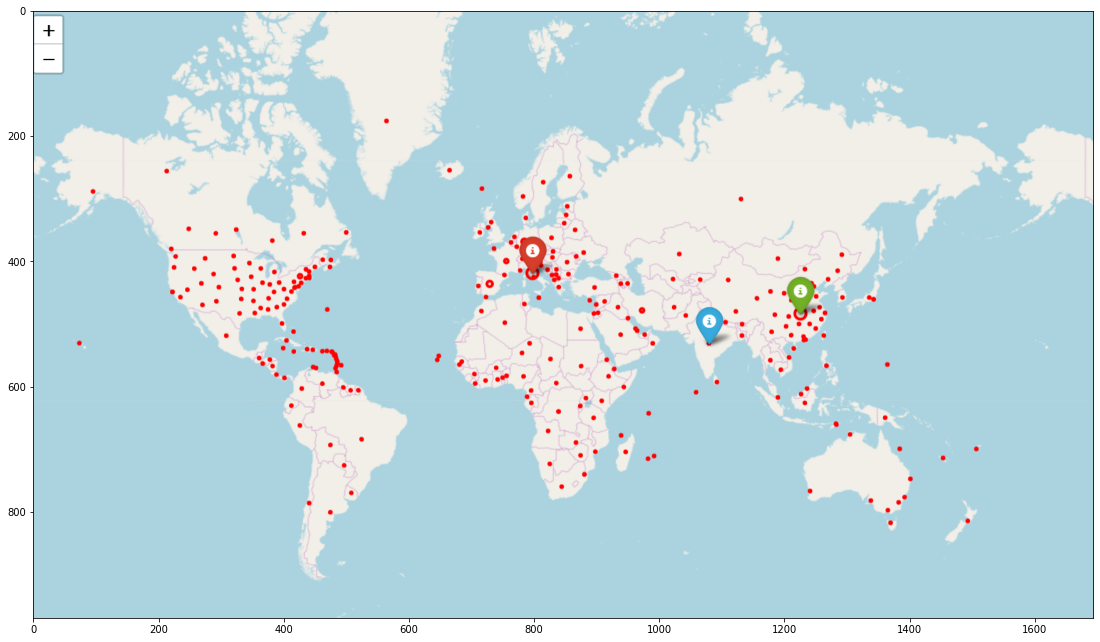

In [49]:
#from google.colab import files
#from io import BytesIO
#from PIL import Image

#uploaded = files.upload()
#im = Image.open(BytesIO(uploaded['Covid-19 on World Map.png']))

#plt.figure(figsize=(19,19))
#plt.imshow(im)
#plt.show()

# **Predictions**

In [26]:
df_pred = pd.DataFrame(ts0,columns=["Confirmed"])
df_pred.tail()

,Confirmed
3/18/20,214910
3/19/20,242708
3/20/20,272166
3/21/20,304524
3/22/20,335955


In [27]:
a = df_pred.values.min()
b = df_pred.values.max()
a,b

(1434, 335955)

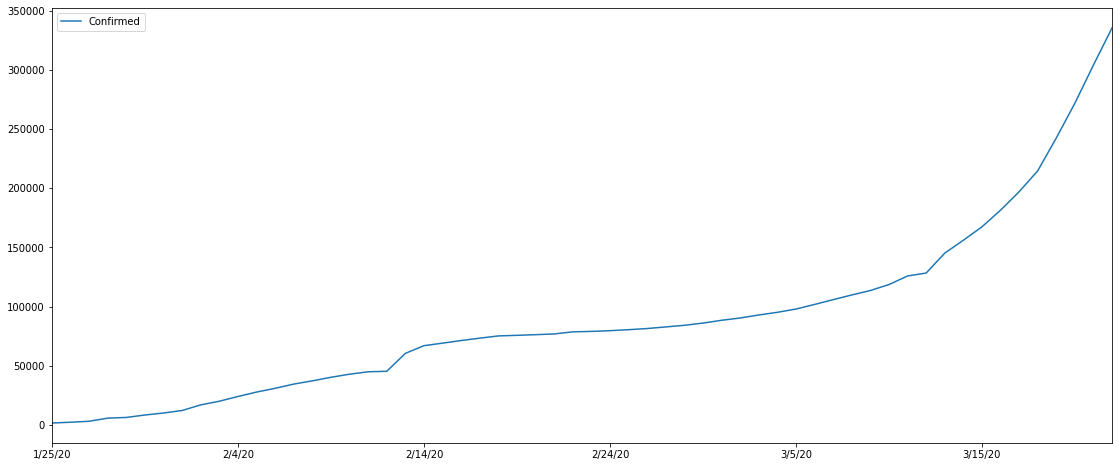

In [28]:
df_pred.plot(figsize=(19,8))
plt.legend(loc=2);

In [0]:
sc = MinMaxScaler()
data = sc.fit_transform(df_pred.values)

train_size = int(len(data) * 0.70)

train_data = data[:train_size , :]
test_data = data[train_size: , :]

In [0]:
def create_dataset(dataset, lag=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-lag-1):
        a = dataset[i:(i+lag), 0]
        dataX.append(a)
        dataY.append(dataset[i + lag, 0])
    return np.array(dataX), np.array(dataY)

In [0]:
lag = 1
X_train, y_train = create_dataset(train_data, lag)
X_test, y_test = create_dataset(test_data, lag)

In [32]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((38, 1), (38,), (16, 1), (16,))

In [33]:
from sklearn.neural_network import MLPRegressor
model = MLPRegressor(hidden_layer_sizes=(51,50000,2000,100),random_state=0).fit(X_train,y_train)
print("Training Score = ",model.score(X_train,y_train))
print("Testing Score = ",model.score(X_test,y_test))

Training Score =  0.9750385053536255
Testing Score =  0.9889317499344985


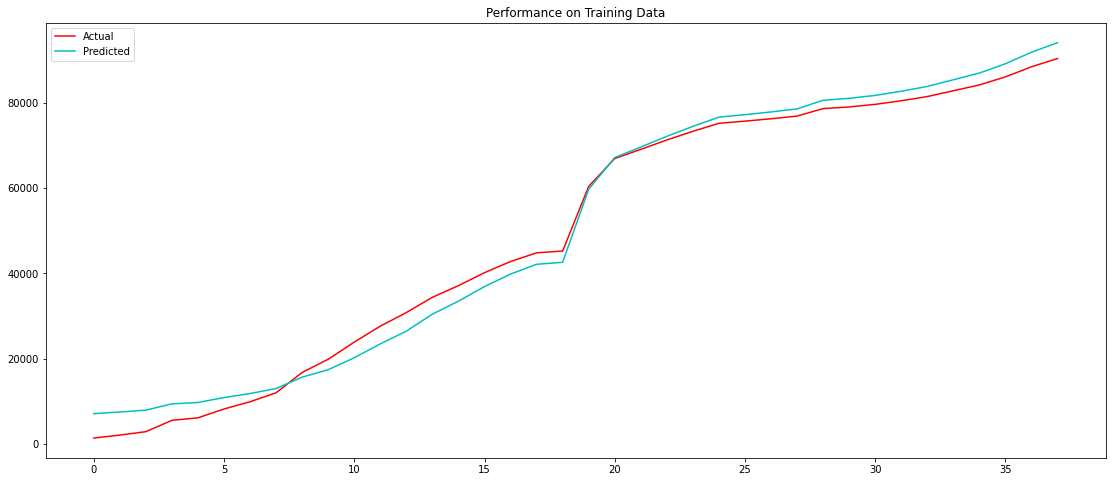

In [34]:
fig = plt.figure(figsize=(19,8))
y_pred_train = model.predict(X_train)
plt.plot(X_train*(b-a)+a,'r',label="Actual")
plt.plot(y_pred_train*(b-a)+a,'c',label="Predicted")
plt.legend()
plt.title("Performance on Training Data");

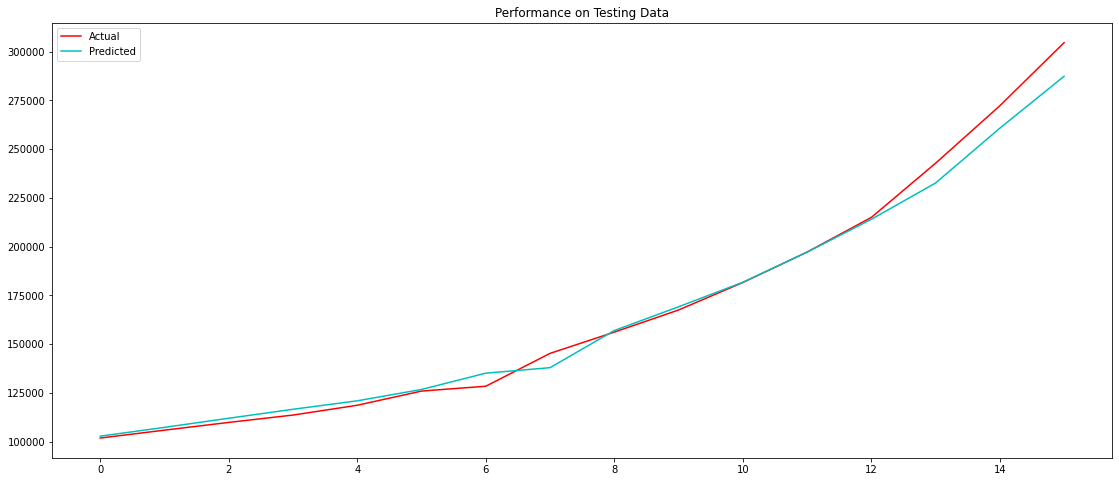

In [35]:
fig = plt.figure(figsize=(19,8))
y_pred = model.predict(X_test)
plt.plot(y_test*(b-a)+a,'r',label="Actual")
plt.plot(y_pred*(b-a)+a,'c',label="Predicted")
plt.legend()
plt.title("Performance on Testing Data");

In [36]:
pd.DataFrame([y_test*(b-a)+a,(y_pred*(b-a)+a).astype(int)],index=["Actual","Predicted"])       #Performs V. well on days 8-12

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
Actual,101784.0,105821.0,109795.0,113561.0,118592.0,125865.0,128343.0,145193.0,156094.0,167446.0,181527.0,197142.0,214910.0,242708.0,272166.0,304524.0
Predicted,102741.0,107257.0,111933.0,116529.0,120878.0,126691.0,135042.0,137868.0,156910.0,169088.0,181667.0,197098.0,213944.0,232564.0,260670.0,287296.0


In [0]:
#fig = plt.figure(figsize=(19,8))
#plt.plot(np.append(X_train,X_test)*(b-a)+a,'r',label="Actual")
#plt.plot(np.append(y_pred_train,y_pred)*(b-a)+a,'c',label="Predicted")
#plt.axvline(x=train_size,color='k',ls='--',label="Train test split")
#plt.legend(loc=2)